In [ ]:
!pip install deepxde
import matplotlib.pyplot as plt          # For Plot
import numpy                      # Array and math functions handling
import deepxde as dde                    # library for PINN
import tensorflow as tf                  # For handling tensor, running program in gpu and Machine Learning
from scipy.interpolate import griddata   # To form a grid of data
# from mpmath import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 15.2 MB/s eta 0:00:00
No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Enable just-in-time compilation with XLA.



In [ ]:

def domain(x_lower, x_upper, t_lower, t_upper) :
    x = numpy.linspace (x_lower, x_upper, 520)
    t = numpy.linspace (t_lower, t_upper, 400)
    X, T = numpy.meshgrid(x, t)
    X_star = numpy.hstack((X.flatten()[:, None], T.flatten()[:, None]))
    space_domain = dde.geometry.Interval(x_lower, x_upper)
    time_domain = dde.geometry.TimeDomain(t_lower, t_upper)
    geomtime = dde.geometry.GeometryXTime(space_domain, time_domain)
    return geomtime, X, T, X_star

def pde(x, y):

    u = y[:, 0:1]
    u_t = dde.grad.jacobian(y, x, j=1)
    u_x = dde.grad.jacobian(y, x, j=0)
    u_xxx = dde.grad.hessian(u_x, x, j=0)

    f_u = u_t - 3/2* u**2 * u_x - 1/4*u_xxx

    return f_u

def num(x, t) :
    q = -4 * ( ( numpy.e )**( 2 * lambda3 * ( x + t * ( lambda3 )**( 2 ) ) ) \
* lambda3 * ( ( ( lambda1 )**( 2 ) + -1 * ( lambda3 )**( 2 ) ) )**( 2 \
) + ( ( numpy.e )**( ( 8 * x * lambda1 + ( 8 * t * ( lambda1 )**( 3 ) \
+ ( 2 * x * lambda3 + 2 * t * ( lambda3 )**( 3 ) ) ) ) ) * lambda3 * \
( ( ( lambda1 )**( 2 ) + -1 * ( lambda3 )**( 2 ) ) )**( 2 ) + ( 2 * ( \
numpy.e )**( ( 2 * x * lambda1 + ( 2 * t * ( lambda1 )**( 3 ) + ( 4 * \
x * lambda3 + 4 * t * ( lambda3 )**( 3 ) ) ) ) ) * lambda1 * ( ( \
lambda1 + lambda3 ) )**( 2 ) * ( ( lambda1 )**( 2 ) + ( 6 * t * ( \
lambda1 )**( 5 ) + ( -1 * ( lambda3 )**( 2 ) + ( -2 * lambda1 * \
lambda3 * ( -1 + x * lambda3 ) + 2 * ( lambda1 )**( 3 ) * ( x + -3 * \
t * ( lambda3 )**( 2 ) ) ) ) ) ) + ( -2 * ( numpy.e )**( ( 6 * x * \
lambda1 + ( 6 * t * ( lambda1 )**( 3 ) + ( 4 * x * lambda3 + 4 * t * \
( lambda3 )**( 3 ) ) ) ) ) * lambda1 * ( ( lambda1 + -1 * lambda3 ) \
)**( 2 ) * ( -1 * ( lambda1 )**( 2 ) + ( 6 * t * ( lambda1 )**( 5 ) + \
( ( lambda3 )**( 2 ) + ( -2 * lambda1 * lambda3 * ( -1 + x * lambda3 \
) + 2 * ( lambda1 )**( 3 ) * ( x + -3 * t * ( lambda3 )**( 2 ) ) ) ) \
) ) + ( 2 * ( numpy.e )**( 2 * lambda1 * ( x + t * ( lambda1 )**( 2 ) \
) ) * lambda1 * ( ( lambda1 + -1 * lambda3 ) )**( 2 ) * ( ( lambda1 \
)**( 2 ) + ( 6 * t * ( lambda1 )**( 5 ) + ( -1 * ( lambda3 )**( 2 ) + \
( -2 * lambda1 * lambda3 * ( 1 + x * lambda3 ) + 2 * ( lambda1 )**( 3 \
) * ( x + -3 * t * ( lambda3 )**( 2 ) ) ) ) ) ) + ( -2 * ( numpy.e \
)**( 6 * lambda1 * ( x + t * ( lambda1 )**( 2 ) ) ) * lambda1 * ( ( \
lambda1 + lambda3 ) )**( 2 ) * ( -1 * ( lambda1 )**( 2 ) + ( 6 * t * \
( lambda1 )**( 5 ) + ( ( lambda3 )**( 2 ) + ( -2 * lambda1 * lambda3 \
* ( 1 + x * lambda3 ) + 2 * ( lambda1 )**( 3 ) * ( x + -3 * t * ( \
lambda3 )**( 2 ) ) ) ) ) ) + 2 * ( numpy.e )**( ( 4 * x * lambda1 + ( \
4 * t * ( lambda1 )**( 3 ) + ( 2 * x * lambda3 + 2 * t * ( lambda3 \
)**( 3 ) ) ) ) ) * lambda3 * ( 72 * ( t )**( 2 ) * ( lambda1 )**( 10 \
) + ( ( lambda3 )**( 4 ) + ( -48 * t * ( lambda1 )**( 8 ) * ( -1 * x \
+ 3 * t * ( lambda3 )**( 2 ) ) + ( 8 * ( lambda1 )**( 6 ) * ( ( x \
)**( 2 ) + ( -12 * t * x * ( lambda3 )**( 2 ) + 9 * ( t )**( 2 ) * ( \
lambda3 )**( 4 ) ) ) + ( ( lambda1 )**( 4 ) * ( -15 + ( -16 * ( x \
)**( 2 ) * ( lambda3 )**( 2 ) + 48 * t * x * ( lambda3 )**( 4 ) ) ) + \
( lambda1 )**( 2 ) * ( -2 * ( lambda3 )**( 2 ) + 8 * ( x )**( 2 ) * ( \
lambda3 )**( 4 ) ) ) ) ) ) ) ) ) ) ) ) ) * ( ( 144 * ( numpy.e )**( 4 \
* lambda1 * ( x + t * ( lambda1 )**( 2 ) ) ) * ( 1 + ( numpy.e )**( 4 \
* lambda3 * ( x + t * ( lambda3 )**( 2 ) ) ) ) * ( t )**( 2 ) * ( \
lambda1 )**( 10 ) + ( 4 * ( 1 + ( numpy.e )**( 4 * lambda1 * ( x + t \
* ( lambda1 )**( 2 ) ) ) ) * ( -1 + ( ( numpy.e )**( 4 * lambda1 * ( \
x + t * ( lambda1 )**( 2 ) ) ) + ( ( numpy.e )**( 4 * lambda3 * ( x + \
t * ( lambda3 )**( 2 ) ) ) + ( -4 * ( numpy.e )**( ( 2 * x * ( \
lambda1 + lambda3 ) + 2 * t * ( ( lambda1 )**( 3 ) + ( lambda3 )**( 3 \
) ) ) ) + -1 * ( numpy.e )**( ( 4 * x * ( lambda1 + lambda3 ) + 4 * t \
* ( ( lambda1 )**( 3 ) + ( lambda3 )**( 3 ) ) ) ) ) ) ) ) * ( lambda1 \
)**( 3 ) * lambda3 + ( 4 * ( 1 + ( numpy.e )**( 4 * lambda1 * ( x + t \
* ( lambda1 )**( 2 ) ) ) ) * ( -1 + ( ( numpy.e )**( 4 * lambda1 * ( \
x + t * ( lambda1 )**( 2 ) ) ) + ( ( numpy.e )**( 4 * lambda3 * ( x + \
t * ( lambda3 )**( 2 ) ) ) + ( -4 * ( numpy.e )**( ( 2 * x * ( \
lambda1 + lambda3 ) + 2 * t * ( ( lambda1 )**( 3 ) + ( lambda3 )**( 3 \
) ) ) ) + -1 * ( numpy.e )**( ( 4 * x * ( lambda1 + lambda3 ) + 4 * t \
* ( ( lambda1 )**( 3 ) + ( lambda3 )**( 3 ) ) ) ) ) ) ) ) * lambda1 * \
( lambda3 )**( 3 ) + ( ( ( 1 + ( numpy.e )**( 4 * lambda1 * ( x + t * \
( lambda1 )**( 2 ) ) ) ) )**( 2 ) * ( 1 + ( numpy.e )**( 4 * lambda3 \
* ( x + t * ( lambda3 )**( 2 ) ) ) ) * ( lambda3 )**( 4 ) + ( 96 * ( \
numpy.e )**( 4 * lambda1 * ( x + t * ( lambda1 )**( 2 ) ) ) * ( 1 + ( \
numpy.e )**( 4 * lambda3 * ( x + t * ( lambda3 )**( 2 ) ) ) ) * t * ( \
lambda1 )**( 8 ) * ( x + -3 * t * ( lambda3 )**( 2 ) ) + ( 2 * ( \
lambda1 )**( 2 ) * ( lambda3 )**( 2 ) * ( 3 + ( 3 * ( numpy.e )**( 8 \
* lambda1 * ( x + t * ( lambda1 )**( 2 ) ) ) + ( 3 * ( numpy.e )**( 4 \
* lambda3 * ( x + t * ( lambda3 )**( 2 ) ) ) + ( 3 * ( numpy.e )**( ( \
8 * x * lambda1 + ( 8 * t * ( lambda1 )**( 3 ) + ( 4 * x * lambda3 + \
4 * t * ( lambda3 )**( 3 ) ) ) ) ) + ( 16 * ( numpy.e )**( ( 6 * x * \
lambda1 + ( 6 * t * ( lambda1 )**( 3 ) + ( 2 * x * lambda3 + 2 * t * \
( lambda3 )**( 3 ) ) ) ) ) * x * lambda3 + ( -16 * ( numpy.e )**( ( 2 \
* x * ( lambda1 + lambda3 ) + 2 * t * ( ( lambda1 )**( 3 ) + ( \
lambda3 )**( 3 ) ) ) ) * x * lambda3 + ( 2 * ( numpy.e )**( ( 4 * x * \
( lambda1 + lambda3 ) + 4 * t * ( ( lambda1 )**( 3 ) + ( lambda3 )**( \
3 ) ) ) ) * ( 3 + ( -8 * x * lambda3 + 4 * ( x )**( 2 ) * ( lambda3 \
)**( 2 ) ) ) + 2 * ( numpy.e )**( 4 * lambda1 * ( x + t * ( lambda1 \
)**( 2 ) ) ) * ( 3 + ( 8 * x * lambda3 + 4 * ( x )**( 2 ) * ( lambda3 \
)**( 2 ) ) ) ) ) ) ) ) ) ) + ( 16 * ( lambda1 )**( 6 ) * ( -6 * ( \
numpy.e )**( ( 6 * x * lambda1 + ( 6 * t * ( lambda1 )**( 3 ) + ( 2 * \
x * lambda3 + 2 * t * ( lambda3 )**( 3 ) ) ) ) ) * t * lambda3 + ( 6 \
* ( numpy.e )**( ( 2 * x * ( lambda1 + lambda3 ) + 2 * t * ( ( \
lambda1 )**( 3 ) + ( lambda3 )**( 3 ) ) ) ) * t * lambda3 + ( ( \
numpy.e )**( 4 * lambda1 * ( x + t * ( lambda1 )**( 2 ) ) ) * ( ( x \
)**( 2 ) + ( -12 * t * x * ( lambda3 )**( 2 ) + 3 * t * lambda3 * ( \
-2 + 3 * t * ( lambda3 )**( 3 ) ) ) ) + ( numpy.e )**( ( 4 * x * ( \
lambda1 + lambda3 ) + 4 * t * ( ( lambda1 )**( 3 ) + ( lambda3 )**( 3 \
) ) ) ) * ( ( x )**( 2 ) + ( -12 * t * x * ( lambda3 )**( 2 ) + 3 * t \
* lambda3 * ( 2 + 3 * t * ( lambda3 )**( 3 ) ) ) ) ) ) ) + ( lambda1 \
)**( 4 ) * ( 1 + ( ( numpy.e )**( 8 * lambda1 * ( x + t * ( lambda1 \
)**( 2 ) ) ) + ( ( numpy.e )**( 4 * lambda3 * ( x + t * ( lambda3 \
)**( 2 ) ) ) + ( ( numpy.e )**( ( 8 * x * lambda1 + ( 8 * t * ( \
lambda1 )**( 3 ) + ( 4 * x * lambda3 + 4 * t * ( lambda3 )**( 3 ) ) ) \
) ) + ( -32 * ( numpy.e )**( ( 6 * x * lambda1 + ( 6 * t * ( lambda1 \
)**( 3 ) + ( 2 * x * lambda3 + 2 * t * ( lambda3 )**( 3 ) ) ) ) ) * \
lambda3 * ( x + -3 * t * ( lambda3 )**( 2 ) ) + ( 32 * ( numpy.e )**( \
( 2 * x * ( lambda1 + lambda3 ) + 2 * t * ( ( lambda1 )**( 3 ) + ( \
lambda3 )**( 3 ) ) ) ) * lambda3 * ( x + -3 * t * ( lambda3 )**( 2 ) \
) + ( ( numpy.e )**( 4 * lambda1 * ( x + t * ( lambda1 )**( 2 ) ) ) * \
( 2 + ( -32 * ( x )**( 2 ) * ( lambda3 )**( 2 ) + ( 96 * t * ( \
lambda3 )**( 3 ) + 32 * x * lambda3 * ( -1 + 3 * t * ( lambda3 )**( 3 \
) ) ) ) ) + ( numpy.e )**( ( 4 * x * ( lambda1 + lambda3 ) + 4 * t * \
( ( lambda1 )**( 3 ) + ( lambda3 )**( 3 ) ) ) ) * ( 2 + ( -32 * ( x \
)**( 2 ) * ( lambda3 )**( 2 ) + ( -96 * t * ( lambda3 )**( 3 ) + 32 * \
x * ( lambda3 + 3 * t * ( lambda3 )**( 4 ) ) ) ) ) ) ) ) ) ) ) ) ) ) \
) ) ) ) ) )**( -1 )
    return q
def cond_u_rw(xm) :
    x = xm [:, 0:1]
    t = xm [:, 1:2]
    u = num (x, t)
    return u
def netmodel(data, neuron, layer, out) :
    net = dde.maps.FNN ([2] + [neuron] * layer + [out], 'tanh', 'Glorot normal')
    model = dde.Model (data, net)
    model.compile ('adam', lr = 1e-3, loss = 'MSE')
    return model
def bound_1(x, on_boundary) :
    return on_boundary and numpy.isclose(x[0], xmin)

def bound_2(x, on_boundary) :
    return on_boundary and numpy.isclose(x[0], xmax)


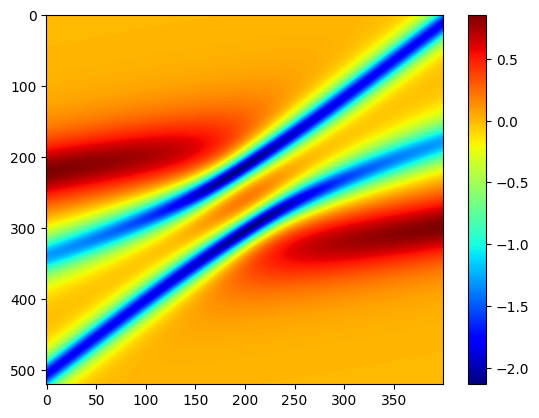

In [ ]:
xmin = -10
xmax = 10
tmin = -10
tmax = 10
geomtime1, X1, T1, X_star1 = domain(xmin, xmax, tmin, tmax)
lambda1 = -0.5
lambda3 = 0.9
u = num (X1, T1)
plt.imshow (u.T, aspect = "auto", cmap = "jet")
plt.colorbar ()


In [ ]:
points = numpy.array([[i, 0] for i in numpy.arange(xmin, xmax, 0.01)])
val1 = cond_u_rw (points)
points1 = numpy.array([[-10, i] for i in numpy.arange(tmin, tmax, 0.01)])
val11 = cond_u_rw (points1)
points2 = numpy.array([[10, i] for i in numpy.arange(tmin, tmax, 0.01)])
val12 = cond_u_rw (points2)
ic_boundnew1 = dde.PointSetBC(points1, val11, component=0, batch_size = None, shuffle=True)
ic_boundnew11 = dde.PointSetBC(points2, val12, component=0, batch_size = None, shuffle=True)
bc_u_0 = dde.DirichletBC (geomtime1, cond_u_rw, bound_1, component = 0)
bc_u_1 = dde.DirichletBC (geomtime1, cond_u_rw, bound_2, component = 0)
bc_u_n = dde.DirichletBC (geomtime1, cond_u_rw, lambda _, on_boundary: on_boundary, component = 0)
ic_u = dde.IC (geomtime1, cond_u_rw, lambda _, on_initial: on_initial, component = 0)
ic_u_new = dde.PointSetBC(points, val1, component=0, batch_size = None, shuffle=True)

In [ ]:
data = dde.data.TimePDE (geomtime1,
                        pde,
                        [ic_boundnew1, ic_boundnew11, ic_u_new], #   bc_u_0,bc_u_1,
                        num_domain = 10000,
                        num_initial = 2000,
                        num_boundary = 2000,
                        train_distribution = "pseudo")


In [ ]:
mod1 = netmodel (data, 30, 6, 1)

Compiling model...
Building feed-forward neural network...
'build' took 0.084644 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 4.997271 s



In [ ]:
dde.optimizers.config.set_LBFGS_options(maxcor=50,
            ftol=1.0 * numpy.finfo(float).eps,    gtol=1e-08,    maxiter=50000,    maxfun=20000,    maxls=50,)
mod1.train (iterations=80000, display_every=1000)

mod1.compile("L-BFGS")
mod1.train()


Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [4.34e-03, 1.58e-01, 1.31e-01, 6.32e-01]    [4.34e-03, 1.58e-01, 1.31e-01, 6.32e-01]    []  
1000      [1.77e-03, 9.26e-05, 2.65e-05, 2.93e-04]    [1.77e-03, 9.26e-05, 2.65e-05, 2.93e-04]    []  
2000      [6.89e-04, 1.58e-05, 6.94e-06, 8.67e-05]    [6.89e-04, 1.58e-05, 6.94e-06, 8.67e-05]    []  
3000      [3.84e-03, 3.06e-04, 6.64e-04, 6.05e-04]    [3.84e-03, 3.06e-04, 6.64e-04, 6.05e-04]    []  
4000      [3.22e-04, 1.06e-05, 4.73e-06, 2.59e-05]    [3.22e-04, 1.06e-05, 4.73e-06, 2.59e-05]    []  
5000      [6.67e-04, 3.49e-05, 6.43e-05, 5.98e-05]    [6.67e-04, 3.49e-05, 6.43e-05, 5.98e-05]    []  
6000      [2.32e-04, 5.38e-06, 4.15e-06, 1.07e-05]    [2.32e-04, 5.38e-06, 4.15e-06, 1.07e-05]    []  
7000      [2.83e-04, 1.29e-05, 2.51e-05, 2.69e-05]    [2.83e-04, 1.29e-05, 2.51e-05, 2.69e-05]    []  
8000      [1.46e-04, 2.31e-06, 2.35e-06, 7.12e-

(<deepxde.model.LossHistory at 0x7d532ff32bc0>,
 <deepxde.model.TrainState at 0x7d532ff319c0>)

In [ ]:
# Make prediction
prediction = mod1.predict(X_star1, operator=None)

u2 = griddata(X_star1, prediction[:, 0], (X1, T1), method="cubic")

print (prediction.shape, prediction[:, 0].shape)

(208000, 1) (208000,)


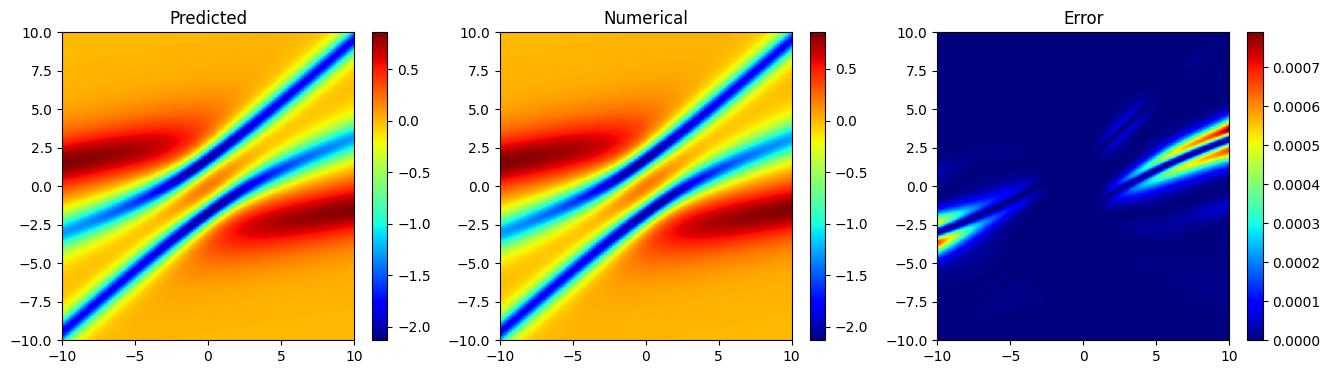

In [ ]:
ext1 = [tmin, tmax, xmin, xmax]

plt.figure (figsize = (16, 4))
plt.subplot (1, 3, 1)
plt.title("Predicted")
plt.imshow(
    u2.T,
    interpolation="nearest", cmap="jet",
    extent=ext1,

    aspect="auto")
plt.colorbar ()
plt.subplot (1, 3, 2)
plt.title("Numerical")
plt.imshow(
    u.T,
    interpolation="nearest", cmap="jet",
    extent=ext1,
    aspect="auto", )
plt.colorbar ()
plt.subplot (1, 3, 3)
plt.title("Error")
plt.imshow(
    abs(u.T - u2.T)**2,
    interpolation="nearest", cmap="jet",
    extent=ext1,
    aspect="auto")
plt.colorbar ()
plt.savefig ("KdV_soliton_solution.jpg")
plt.show ()

In [ ]:
u_num = num (X_star1[:, 0:1], X_star1[:, 1:2])
file1 = open ("mkdv-pos-sol-col.txt", 'w')
file1.write ("x"+" "+"t"+" "+"u"+" "+"uN\n")
for i in range (len(X_star1)) :
    file1.write (str(X_star1[i, 0])+" "+str(X_star1[i, 1]) +" "+str(u_num[i, 0])+" "+str(prediction[i, 0])+"\n")
import pandas as pd
val_out = pd.read_csv("mkdv-pos-sol-col.txt", sep = " ")
print (val_out.shape)


(207921, 4)
